In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

In [61]:
dataset = pd.read_csv('../loan.csv')
dataset.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [64]:
dataset.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [49]:
dataset.shape

(601, 11)

In [44]:
# dataset['Gender'].fillna(dataset['Gender'].mode()[0], inplace=True)
dataset['Married'].fillna(dataset['Married'].mode()[0], inplace=True)

C:\Users\Prati\AppData\Local\Temp\ipykernel_20768\2215539409.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['Married'].fillna(dataset['Married'].mode()[0], inplace=True)


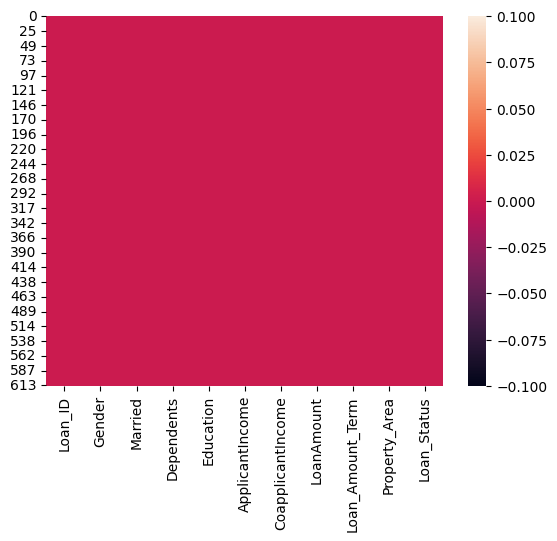

In [53]:
sns.heatmap(dataset.isnull())
plt.show()

In [35]:
dataset = dataset.drop(columns=['Credit_History', 'Self_Employed']) # delete entire column

In [ ]:
dataset.dropna(subset=['Gender'], inplace=True) # this will delete the row containing null value in passed columns

In [47]:
dataset['LoanAmount'].fillna(dataset['LoanAmount'].mean(), inplace=True)

C:\Users\Prati\AppData\Local\Temp\ipykernel_20768\165839853.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['LoanAmount'].fillna(dataset['LoanAmount'].mean(), inplace=True)


In [ ]:
dataset.fillna(method='ffill', inplace=True) # you know backward and forward filling with meaning of axis value 0 or 1

C:\Users\Prati\AppData\Local\Temp\ipykernel_20768\3956088629.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dataset.fillna(method='ffill', inplace=True)


In [ ]:
for i in dataset.select_dtypes(include='object').columns:
  print(i) # can use this to fill mode in missing data of all object type columns.

Loan_ID
Gender
Married
Dependents
Education
Property_Area
Loan_Status


In [63]:

for i in dataset.select_dtypes(include='object').columns:
  dataset[i].fillna(dataset[i].mode()[0], inplace=True)

C:\Users\Prati\AppData\Local\Temp\ipykernel_20768\728715482.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset[i].fillna(dataset[i].mode()[0], inplace=True)


In [71]:
si = SimpleImputer(strategy='mean')
arr = si.fit_transform(dataset[['CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']])

In [72]:
pf = pd.DataFrame(arr, columns=['CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History'])
pf

,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0.0,146.412162,360.0,1.0
1,1508.0,128.000000,360.0,1.0
2,0.0,66.000000,360.0,1.0
3,2358.0,120.000000,360.0,1.0
4,0.0,141.000000,360.0,1.0
...,...,...,...,...
609,0.0,71.000000,360.0,1.0
610,0.0,40.000000,180.0,1.0
611,240.0,253.000000,360.0,1.0
612,0.0,187.000000,360.0,1.0
